## EDA Theme or Direction

We are going to look at the following within each presidential state of union address:

1. **Common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words
3. **Wordcount involving International Issues** - frequency of words that involve China, Russia, N/S Korea
4. **Wordcount involving Domestic Issues** - frequency of words that involve race, income inequality, climate change

The main goal is to use these metrics to identify what the focus of the president is without the need to spend time to read the entire text.

## Common words/Wordcloud

In [1]:
# Import pandas to read document-term matrix
import pandas as pd
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data

,Barack Obama_2010,Barack Obama_2011,Barack Obama_2012,Barack Obama_2013,Barack Obama_2014,Barack Obama_2015,Barack Obama_2016,Bill Clinton_1994,Bill Clinton_1995,Bill Clinton_1996,...,Richard M. Nixon_1971,Richard M. Nixon_1972,Richard M. Nixon_1974,Ronald Reagan_1982,Ronald Reagan_1983,Ronald Reagan_1984,Ronald Reagan_1985,Ronald Reagan_1986,Ronald Reagan_1987,Ronald Reagan_1988
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,1,0,0,0,1,0,1,0,3,...,0,0,1,0,0,1,1,2,1,0
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
abbas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdication,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zerooverall,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
zimbabwe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zion,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,1,0,1,...,0,0,0,2,1,2,2,0,0,0


In [3]:
# create a dictionary that contains top 30 words based on the matrix
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

print(top_dict['Barack Obama_2010'])

[('year', 46), ('people', 33), ('work', 32), ('job', 29), ('americans', 27), ('know', 26), ('business', 25), ('right', 23), ('help', 22), ('let', 22), ('america', 21), ('time', 20), ('new', 20), ('nation', 19), ('family', 19), ('american', 19), ('need', 15), ('energy', 15), ('economy', 15), ('country', 15), ('value', 14), ('decade', 14), ('deficit', 14), ('reform', 13), ('tax', 13), ('million', 13), ('cut', 13), ('government', 13), ('come', 12), ('clean', 12)]


In [4]:
# organize everything and print out the top 15 words for each presidential state of the union address
for president, top_words in top_dict.items():
    print(president)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Barack Obama_2010
year, people, work, job, americans, know, business, right, help, let, america, time, new, nation
---
Barack Obama_2011
applause, year, new, people, job, work, america, come, know, business, american, need, good, nation
---
Barack Obama_2012
applause, job, year, american, america, right, work, new, business, people, energy, tax, country, americans
---
Barack Obama_2013
applause, job, year, work, america, new, right, let, people, need, tonight, country, american, high
---
Barack Obama_2014
work, help, job, year, new, america, americans, people, let, business, american, congress, need, like
---
Barack Obama_2015
applause, new, year, america, work, job, need, time, family, let, people, country, want, world
---
Barack Obama_2016
applause, year, work, america, people, world, change, american, want, need, new, job, country, way
---
Bill Clinton_1994
people, work, year, health, care, job, know, congress, american, country, welfare, world, crime, child
---
Bill Clinton_1995
pe

In [5]:
# we can see that there are still a lot of stop words, we will eliminate them by adding them to the stopword list
# extract the top 30 words for each state of union speech
from collections import Counter
words = []
for president in data.columns:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)
print(words[:30])

['year', 'people', 'work', 'job', 'americans', 'know', 'business', 'right', 'help', 'let', 'america', 'time', 'new', 'nation', 'family', 'american', 'need', 'energy', 'economy', 'country', 'value', 'decade', 'deficit', 'reform', 'tax', 'million', 'cut', 'government', 'come', 'clean']


In [6]:
# Then identiry most common words that everybody uses
Counter(words).most_common()[:10]

[('year', 50),
 ('people', 50),
 ('new', 47),
 ('american', 45),
 ('america', 44),
 ('world', 42),
 ('help', 40),
 ('nation', 38),
 ('work', 37),
 ('congress', 37)]

In [15]:
# The criteria is if more than half of the presidential speeches have them, then they should be added to the stop word list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
stop_list = ['year','american','america','people','new','help','time','let','come','applause',\
            'thing','thank','seek','try','ago','plan']

for i in stop_list:
    add_stop_words.append(i)

add_stop_words[:10]

['year',
 'people',
 'new',
 'american',
 'america',
 'world',
 'help',
 'nation',
 'work',
 'congress']

In [16]:
# then update the document-term matrix with the generated list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# load the clean data
data_clean = pd.read_pickle('data_clean.pkl')

# add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# re-create the document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# store as pickle for later usage
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [17]:
# create a wordcloud, must install through 'conda install -c conda-forge wordcloud'
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

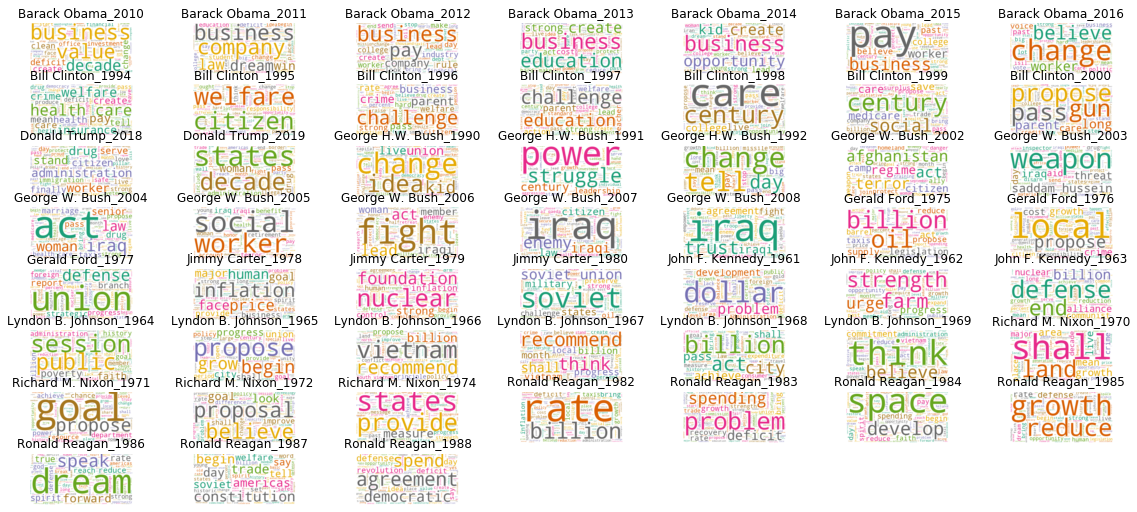

In [18]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

full_names = data.columns.tolist()

# Create subplots for each state of union address
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(9, 7, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

Based on the wordcloud, each president had a different but consistent on what they addressed during the years.

1. **George H.W. Bush** - consistent focus on future and change;
2. **Bill Clinton** - the most diverse candidate in what he addresses, each year is different, his themes focused on healthcare, taxcuts, parenting, investing;
3. **George W. Bush** - constant focus on terrorism, iraq and freedom;
4. **Barack Obama** - surprisingly obsessed with business and the economy;
5. **Donald Trump** - focused on nationalism and women's rights.

Of course, the word cloud only gives us some idea as to what is going on, we will continue to dig deeper.

## Size of vocabulary

In [39]:
# Identify the non-zero items in the document-term matrix
unique_list = []
for president in data.columns:
    uniques = data[president].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count along with president info
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['president', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort.tail()

,president,unique_words
38,Lyndon B. Johnson_1967,1246
4,Barack Obama_2014,1257
11,Bill Clinton_1998,1331
13,Bill Clinton_2000,1332
33,John F. Kennedy_1962,1477


In [40]:
# clean up the data frame to only include presidents and aggregate everything
president_list = []
for i in data_unique_sort.president:
    president_list.append(i[:-5])
data_unique_sort['president_name'] = president_list
data_unique_sort.drop('president',axis = 1, inplace = True)

In [41]:
# aggregate the unique word values
df = data_unique_sort.groupby('president_name').count()
df2 = data_unique_sort.groupby('president_name').sum()
df['president_name'] = df.index
df.reset_index(drop=True, inplace=True)
df2['president_name'] = df2.index
df2.reset_index(drop=True, inplace=True)
df = df.join(df2, lsuffix='_words', rsuffix='_count').drop('president_name_count', axis=1)

In [42]:
df['avg_count'] = df['unique_words_count']/df['unique_words_words']
df = df[['president_name_words','unique_words_words','unique_words_count','avg_count']]
df.columns = ['president','state_of_union_address','total_word_count','avg_word_count']

In [43]:
president_party = pd.read_csv('C:\\Users\\alanl\\Desktop\\nlp_project\\links.csv')
president_party = president_party[['President','Party']]
president_party = president_party.drop_duplicates()
president_party.columns = ['president_name', 'party']

In [45]:
df = pd.merge(df, president_party, left_on = 'president', right_on = 'president_name')

In [46]:
df

,president,state_of_union_address,total_word_count,avg_word_count,president_name,party
0,Barack Obama,7,8317,1188.142857,Barack Obama,D
1,Bill Clinton,7,8481,1211.571429,Bill Clinton,D
2,Donald Trump,2,2333,1166.500000,Donald Trump,R
3,George H.W. Bush,3,2577,859.000000,George H.W. Bush,R
4,George W. Bush,7,7409,1058.428571,George W. Bush,R
5,Gerald Ford,3,2829,943.000000,Gerald Ford,R
6,Jimmy Carter,3,2305,768.333333,Jimmy Carter,D
7,John F. Kennedy,3,3905,1301.666667,John F. Kennedy,D
8,Lyndon B. Johnson,6,5920,986.666667,Lyndon B. Johnson,D
9,Richard M. Nixon,4,3413,853.250000,Richard M. Nixon,R


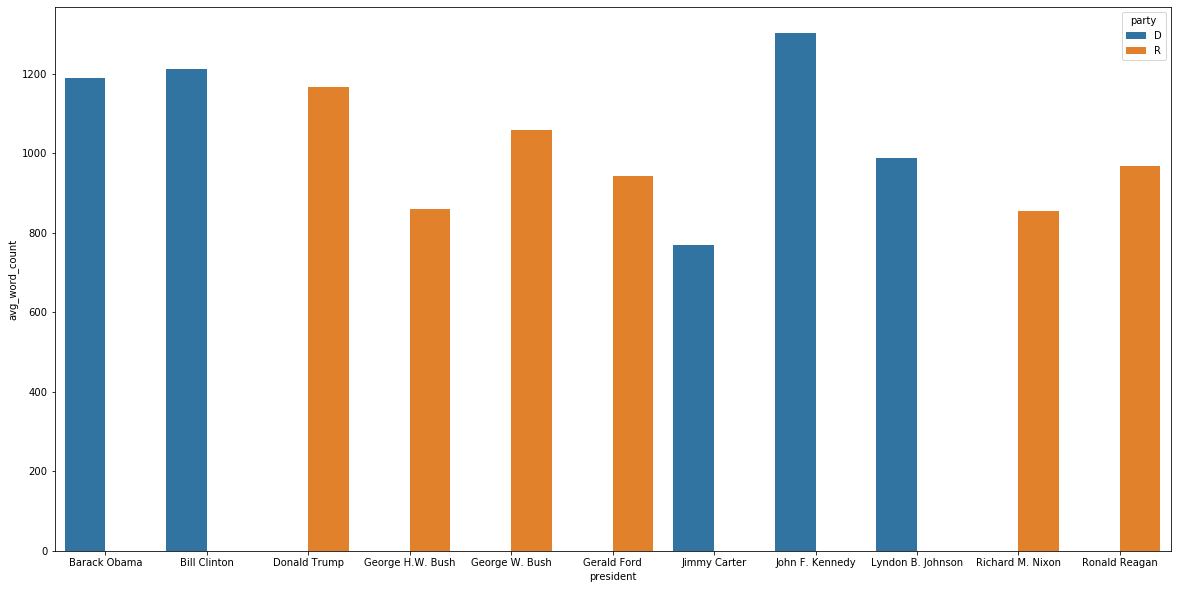

In [47]:
# let's look at unique words each president used
import seaborn as sns
sns.barplot(x="president", y="avg_word_count", hue ="party", data=df)

Based on this chart, we can see that both Bushes had less unique words within their state of the union address. Clinton seemed to have the greatest vocabulary, which could be due to educational background,since he had a Juris Doctor Degree. There is no obvious difference of word count between democrats and republicans.

## Wordcount involving international issues

In [48]:
# generate a list containing nations that are competing against the US and other major concerns
data_international = data.transpose()[['iraq','soviet','russia', 'china','iran','afghanistan','mexico','saudi','vietnam','pakistan','korea','terrorist','trade','nuclear','israel']]
data_international['i_issues'] = data_international.sum(axis = 1, skipna = True)
data_international.sample(n=10, random_state = 30)

,iraq,soviet,russia,china,iran,afghanistan,mexico,saudi,vietnam,pakistan,korea,terrorist,trade,nuclear,israel,i_issues
Bill Clinton_1997,0,0,2,6,0,0,3,0,1,0,3,1,5,5,0,26
Ronald Reagan_1985,0,2,0,1,0,1,0,0,2,0,0,1,6,4,0,17
Lyndon B. Johnson_1968,0,4,0,2,0,0,0,0,6,0,2,0,6,4,0,24
Richard M. Nixon_1972,0,2,0,1,0,0,0,0,1,0,0,0,1,1,0,6
George W. Bush_2005,13,0,0,0,1,3,0,2,0,1,1,12,0,3,2,38
Jimmy Carter_1978,0,2,0,0,0,0,0,0,0,0,0,0,6,7,0,15
John F. Kennedy_1961,0,5,0,1,0,0,0,0,0,0,0,0,2,3,0,11
John F. Kennedy_1963,0,1,0,2,0,0,0,0,5,0,1,0,6,12,0,27
John F. Kennedy_1962,0,1,0,1,0,0,0,0,1,0,0,0,6,4,0,13
George W. Bush_2008,21,0,0,1,5,4,1,0,0,2,1,17,7,4,2,65


## Wordcount involving domestic issues

In [51]:
# generate a list containing domestic issues
data_domestic = data.transpose()[['race', 'immigrant', 'deficit','gun','drug','crime','economy','education','income','job','energy']]
data_domestic['d_issues'] = data_domestic.sum(axis = 1, skipna = True)
data_domestic.sample(n=10, random_state = 30)

,race,immigrant,deficit,gun,drug,crime,economy,education,income,job,energy,d_issues
Bill Clinton_1997,0,4,1,1,6,3,12,15,1,14,1,58
Ronald Reagan_1985,0,0,3,0,1,5,15,2,3,10,2,41
Lyndon B. Johnson_1968,0,0,8,2,10,12,4,2,6,12,2,58
Richard M. Nixon_1972,0,0,0,0,1,4,1,1,4,3,0,14
George W. Bush_2005,1,0,1,0,1,1,11,1,2,7,4,29
Jimmy Carter_1978,1,0,4,0,0,0,11,3,3,14,12,48
John F. Kennedy_1961,2,0,8,0,0,1,9,2,3,4,2,31
John F. Kennedy_1963,1,0,4,0,0,1,6,0,3,5,4,24
John F. Kennedy_1962,6,0,5,0,2,2,7,7,4,12,2,47
George W. Bush_2008,0,0,1,0,1,0,6,4,0,6,5,23


## What do presidents care about more? Domestic or International Issues

In [56]:
data_issues = pd.concat([data_international.i_issues, data_domestic.d_issues], axis=1)
data_issues.columns = ['international', 'domestic']

president_list = []
year_list = []
for i in data_issues.index:
    president_list.append(i[:-5])
    year_list.append(i[-4:])
    
data_issues.reset_index(drop=True, inplace=True)
data_issues['president_name'] = president_list
data_issues['year'] = year_list
data_issues = data_issues[['president_name','year','international','domestic']]
data_issues = data_issues.set_index('year')
data_issues.head()

,president_name,international,domestic
year,,,
2010,Barack Obama,23,86
2011,Barack Obama,28,81
2012,Barack Obama,23,97
2013,Barack Obama,18,116
2014,Barack Obama,32,75


In [57]:
data_issues = pd.merge(data_issues, president_party, on='president_name')

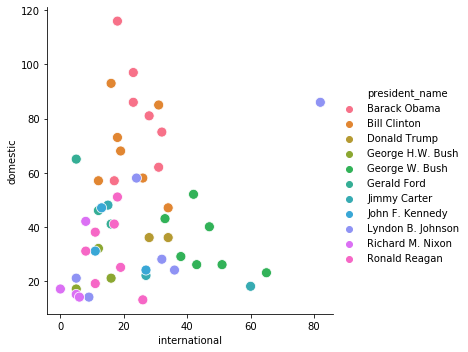

In [59]:
sns.relplot(x="international", y="domestic", hue="president_name",data=data_issues, s = 100);

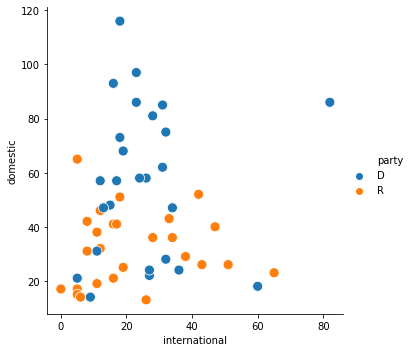

In [60]:
sns.relplot(x="international", y="domestic", hue="party",data=data_issues, s = 100);

In [61]:
data_issues['i_vs_d'] = data_issues['international']/data_issues['domestic']

In [62]:
tmp = pd.DataFrame(data_issues.groupby('president_name')['i_vs_d'].mean()).reset_index()
tmp = pd.merge(tmp,president_party, on='president_name')
tmp

,president_name,i_vs_d,party
0,Barack Obama,0.318617,D
1,Bill Clinton,0.349277,D
2,Donald Trump,0.861111,R
3,George H.W. Bush,0.477007,R
4,George W. Bush,1.500279,R
5,Gerald Ford,0.242679,R
6,Jimmy Carter,1.624369,D
7,John F. Kennedy,0.585478,D
8,Lyndon B. Johnson,0.815182,D
9,Richard M. Nixon,0.238095,R


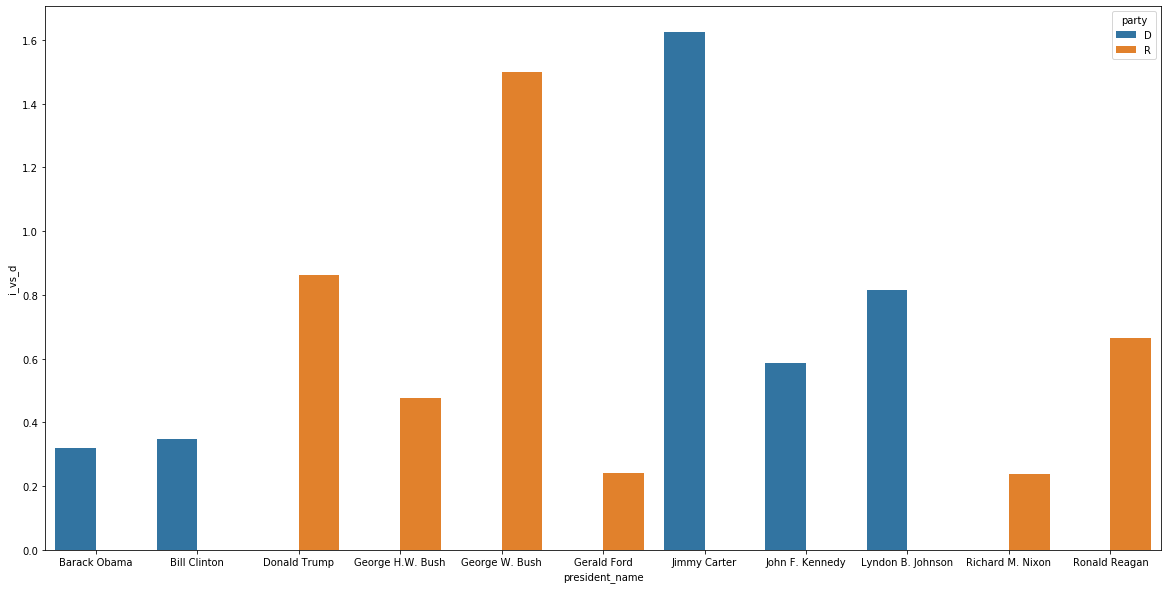

In [63]:
sns.barplot(x="president_name", y="i_vs_d", data=tmp,
            hue="party")

In [64]:
data_issues.groupby('party')['i_vs_d'].mean()

party
D    0.622919
R    0.768834
Name: i_vs_d, dtype: float64

On average, it seems that republicans are more interested in international issues compared to their fellow democrats.